In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Note: Plotting code written with assistance from Google's Gemini

### Baseline CNN models

Index(['index', 'Unnamed: 0', 'totalims', 'correctims', 'nims_snow_severe',
       'correct_snow_severe', 'nims_snow', 'correct_snow', 'nims_wet',
       'correct_wet', 'nims_dry', 'correct_dry', 'nims_poor_viz',
       'correct_poor_viz', 'ok', 'exp_desc', 'exp_details', 'rundatetime',
       'overall', 'perc_dry', 'perc_poor_viz', 'perc_snow', 'perc_snow_severe',
       'perc_wet', 'avg_recall'],
      dtype='object')


,index,Unnamed: 0,totalims,correctims,nims_snow_severe,correct_snow_severe,nims_snow,correct_snow,nims_wet,correct_wet,...,rundatetime,overall,perc_dry,perc_poor_viz,perc_snow,perc_snow_severe,perc_wet,avg_recall,arch,desc
11,11,11,107445,68983,7635,5669,14945,8370,42290,28445,...,2025-06-29 04:19:28.258097,0.642031,0.608421,0.738579,0.560054,0.742502,0.672618,0.664435,densenet,Transfer learn: AST | Aug: N
29,29,29,107445,69292,7635,5778,14945,8508,42290,28059,...,2025-07-01 14:24:54.035309,0.644907,0.620737,0.734208,0.569287,0.756778,0.663490,0.668900,densenet,Transfer learn: AST | Aug: Y
5,5,5,107445,70141,7635,5486,14945,8230,42290,29504,...,2025-06-29 03:31:56.266625,0.652808,0.618658,0.745792,0.550686,0.718533,0.697659,0.666266,densenet,Transfer learn: GEN | Aug: N


[[0.6528084136069617, 0.6420308064591186, 0.6015356694122574, 0.6584392014519056, 0.6449066964493462, 0.6228768206989622], [0.6114570245241752, 0.6029596537763507, 0.5514542323979711, 0.6108892921960073, 0.6048955279445297, 0.5980175903950858], [0.6784215179859463, 0.6630462096886779, 0.5618130206151984, 0.6728000372283494, 0.6610544929964167, 0.5896132905207315], [0.683233282144353, 0.6771836753687933, 0.5514542323979711, 0.6912559914374796, 0.6805621480757597, 0.5811996835590302], [0.6030341104751268, 0.5290334589790125, 0.5039043231420727, 0.6037135278514589, 0.5623062962445903, 0.5269952068500163], [0.6111685048164177, 0.6011913071804179, 0.5852482665549816, 0.6092140164735446, 0.5976546139885522, 0.6228768206989622]]
['densenet', 'incep', 'mobilenet', 'resnet', 'vgg16', 'xcep']
[['Transfer learn: GEN | Aug: N', 'Transfer learn: AST | Aug: N', 'Transfer learn: None | Aug: N', 'Transfer learn: GEN | Aug: Y', 'Transfer learn: AST | Aug: Y', 'Transfer learn: None | Aug: Y'], ['Transfe

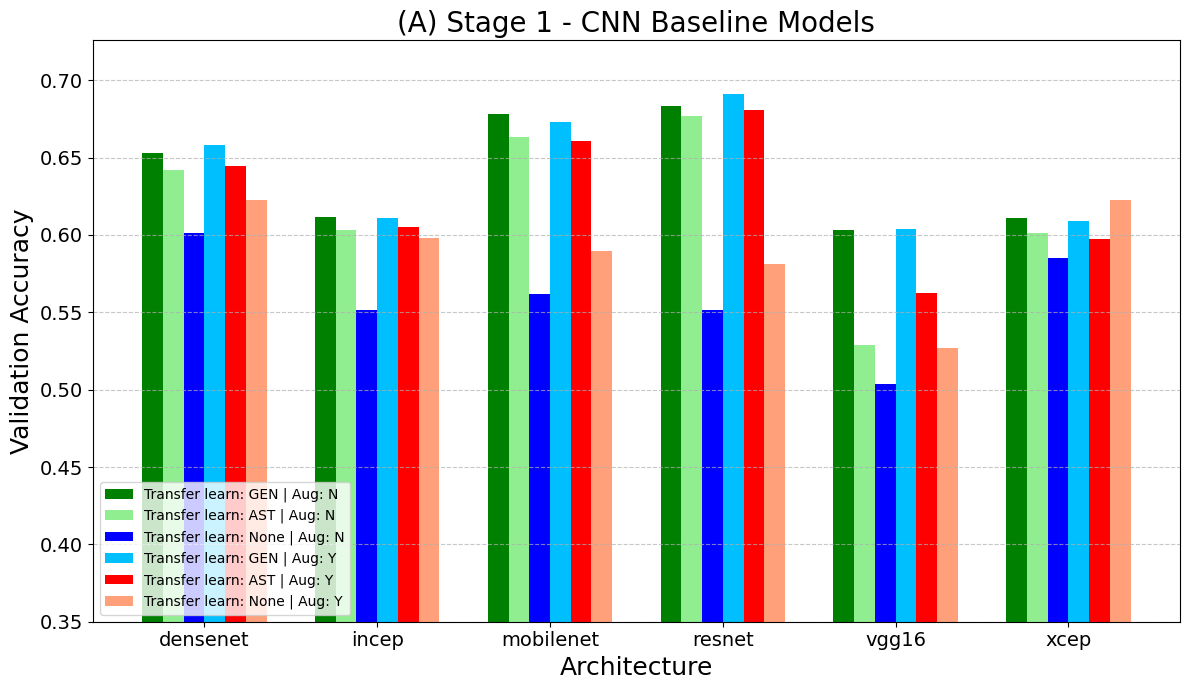

In [56]:
### PREPARE DATA
df = pd.read_csv("/home/csutter/DRIVE-clean/CNN/data_results/results_by_exp_innerVal_metrics.csv")

df_bl = df[0:36].reset_index()
print(df_bl.columns)


# grab arch
archs = []
tls = []
augs = []
# asts = []
for i in range(0,len(df_bl)):
    a = df_bl["exp_details"][i]
    # arch
    a1 = a[3:] # remove the _A_
    end = a1.find("_") # find the next _ which is the end of the arch name
    arch = a1[:end]
    archs.append(arch)
    # TRLE
    # print(a)
    beg1 = a.find("TRLE")
    # print(beg1)
    b1 = a[beg1:]
    end1 = b1.find("_")
    trle = b1[4:end1]
    # print(trle)
    if trle == "True":
        beg1 = a.find("AST")
        c1 = a[beg1:]
        end1 = c1.find("_")
        ast = c1[3:end1]
        # asts.append(ast)
        # print(ast)
        if ast == "True":
            tls.append("Transfer learn: AST")
        else:
            tls.append("Transfer learn: GEN")
    else:
        tls.append("Transfer learn: None")
    # TRLE
    beg1 = a.find("Aug")
    d1 = a[beg1:]
    # end1 = d1.find("_")
    aug = d1[3:]
    # print(aug)
    if aug == "True":
        augs.append("Aug: Y")
    else:
        augs.append("Aug: N")

descs = []
for i in range(0, len(tls)):
    d = f"{tls[i]} | {augs[i]}"
    descs.append(d)


# print(archs)
# print(descs)


df_bl["arch"] = archs
df_bl["desc"] = descs

# display(df_bl.head(4))

df_bl_sorted = df_bl.sort_values(["arch","desc"])

# there are 6 groups (of archs) and 6 data points (descs) within each arch -- to make the 36 total models
# the df is sorted, so now just go through and collect lists of lists in the order needed for plotting



display(df_bl_sorted.head(3))

# organize in lists of lists for plotting
data_grouped= []
groupnames = []
barnames = [] # will be a list of lists (just like the data_grouped) but this inner list is of desc names... just make sure each one is the same order, which they should be bc data was already sorted accordingly, but this is just to double check that the bars are in the right order for each arch
for a in np.unique(archs):
    groupnames.append(a)
    df_arch = df_bl[df_bl["arch"]==a].reset_index()
    data_for_that_arch = list(df_arch["overall"])
    # print(data_for_that_arch)
    data_grouped.append(data_for_that_arch)
    # just to double check.. 
    descs_for_that_arch = list(df_arch["desc"])
    barnames.append(descs_for_that_arch)


print(data_grouped)
print(groupnames)
print(barnames)


#### MAKE PLOTS

data = np.array(data_grouped)
# Group labels
group_labels = groupnames

# Model labels for the legend
# after checking all the barnames are the same, just grab one of them for making the key
model_labels = barnames[0]#[f'Model {i}' for i in barnames[0]] 

# Colors for each model
colors = ["green", "lightgreen", "blue", "deepskyblue", "red", "lightsalmon"] 

# # Colors for each model
# colors = plt.cm.get_cmap('tab10', 6) # Using a colormap for distinct colors

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 7)) # Adjust figure size as needed

# Bar width
bar_width = 0.12

# Positions for the groups on the x-axis
group_positions = np.arange(len(group_labels))

# Plotting the bars for each model within each group
for i in range(data.shape[1]): # Iterate through models (columns of data)
    # Calculate the x-position for each set of bars within a group
    # This offsets each model's bars so they appear side-by-side
    offset = (i - (data.shape[1] - 1) / 2) * bar_width
    ax.bar(group_positions + offset, data[:, i], bar_width, label=model_labels[i], color=colors[i])

# Customize the chart
ax.set_xlabel('Architecture', fontsize=18)
ax.set_ylabel('Validation Accuracy', fontsize=18)
ax.set_title('(A) Stage 1 - CNN Baseline Models', fontsize=20)
ax.set_xticks(group_positions) # Set x-ticks at the center of each group
ax.set_xticklabels(group_labels, fontsize=14) # Set group labels
ax.tick_params(axis='y', labelsize=14) # Adjust y-axis tick label size

# Set the y-axis to start at 0
ax.set_ylim(bottom=0.35)

# Add a grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add the legend to the bottom left corner
ax.legend(loc='lower left', bbox_to_anchor=(0, 0))

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [57]:
df_ht = df[36:].reset_index()

# Not plotting results from HT... not worth it, very small differences and small net gain, not super insightful for paper. Maybe for dissertation

### Plots for downstream hyp tuning

Make it the same as above, but for each of the 4 BL models, show the performance of the *best* from each of the 5 algorithms from downstream model

In [24]:
df = pd.read_csv("/home/csutter/DRIVE-clean/downstream/data_results/results_by_exp_innerVal.csv")

df["overall"] = df["correctims"]/df["totalims"]


for c in ["dry", "poor_viz", "snow", "snow_severe", "wet"]:
    df[f"perc_{c}"] = df[f"correct_{c}"]/df[f"nims_{c}"]



df["avg_recall"] = df[["perc_dry", "perc_poor_viz", "perc_snow", "perc_snow_severe", "perc_wet"]].mean(axis = 1)

# grab one from  a specific arch
archs = []
for i in range(0,len(df)):
    desc = df["exp_desc"][i]
    desc = desc[2:]
    end = desc.find("_")
    a = desc[:end]
    archs.append(a)

df["arch"] = archs

display(df.head(3))
# grab the specific ML classif model
algs = []
for i in range(0,len(df)):
    desc = df["exp_details"][i]
    # print(desc)
    if "rf" in desc:
        alg ="RF"
    elif "logistic" in desc:
        alg = "Logistic"
    elif "gnb" in desc:
        alg = "GNB"
    elif "svm" in desc:
        alg = "SVM"
    elif "DNN" in desc:
        # print("entered dnn")
        alg = "DNN"
    algs.append(alg)

df["alg"] = algs

df = df[["exp_desc","alg","overall"]].groupby(["exp_desc","alg"]).max()

# df["overall"] = df["correctims"]/df["totalims"]


# for c in ["dry", "poor_viz", "snow", "snow_severe", "wet"]:
#     df[f"perc_{c}"] = df[f"correct_{c}"]/df[f"nims_{c}"]



# df["avg_recall"] = df[["perc_dry", "perc_poor_viz", "perc_snow", "perc_snow_severe", "perc_wet"]].mean(axis = 1)

display(df)


# # Decision: index 1507 showed up in a variety of different weighted-importances (when we tried these below), and replaced the initial top 10 with weighted recall rather than just plain average. Motivation to keep it simple and just move forward with the simplest -- top 10 avg recall, then take the max overall from that. Top models are all pretty similar, anyway. 
# top10_avgrecall = df.sort_values("avg_recall", ascending=False)[0:10]
# selected4 = top10_avgrecall.sort_values("overall", ascending=False)[0:1]
# display(selected4)
# # Decision: index 1507 showed up in a variety of different weighted-importances (when we tried these below), and replaced the initial top 10 with weighted recall rather than just plain average. Motivation to keep it simple and just move forward with the simplest -- top 10 avg recall, then take the max overall from that. Top models are all pretty similar, anyway. 

# for exp in np.unique(df["exp_desc"]):
#     sub = df[df["exp_desc"]==exp]
#     print(exp)
#     top10_avgrecall = sub.sort_values("avg_recall", ascending=False)[0:4]
#     selected4 = top10_avgrecall.sort_values("overall", ascending=False)[0:1]

#     display(selected4)

#     print(selected4["exp_details"])
#     print(np.max(selected4["perc_snow"]))

,Unnamed: 0,exp_desc,exp_details,totalims,correctims,nims_snow_severe,correct_snow_severe,nims_snow,correct_snow,nims_wet,...,correct_poor_viz,ok,overall,perc_dry,perc_poor_viz,perc_snow,perc_snow_severe,perc_wet,avg_recall,arch
0,0,A_mobilenet_TRLETrue_ASTFalse_L21e-05_DR0_4_E7...,"DNN_{'hidden_layers': 1, 'hidden_units': '[16]...",107445,80100,7635,6091,14945,10848,42290,...,3481,97472,0.745498,0.781132,0.760874,0.725861,0.797773,0.709317,0.754991,mobilenet
1,1,A_mobilenet_TRLETrue_ASTFalse_L21e-05_DR0_4_E7...,"DNN_{'hidden_layers': 1, 'hidden_units': '[16]...",107445,80294,7635,6130,14945,10695,42290,...,3502,97540,0.747303,0.790000,0.765464,0.715624,0.802881,0.708134,0.756421,mobilenet
2,2,A_mobilenet_TRLETrue_ASTFalse_L21e-05_DR0_4_E7...,"DNN_{'hidden_layers': 1, 'hidden_units': '[16]...",107445,80141,7635,6096,14945,10740,42290,...,3505,97553,0.745879,0.791842,0.766120,0.718635,0.798428,0.702530,0.755511,mobilenet


overall
exp_desc                                           alg               
A_mobilenet_TRLETrue_ASTFalse_L21e-05_DR0_4_E75... DNN       0.768514
                                                   GNB       0.687552
                                                   Logistic  0.775848
                                                   RF        0.808646
                                                   SVM       0.774378
A_resnet_TRLETrue_ASTFalse_L20_001_DR0_4_E75_Au... DNN       0.773465
                                                   GNB       0.689739
                                                   Logistic  0.778659
                                                   RF        0.806338
                                                   SVM       0.777114
A_resnet_TRLETrue_ASTFalse_L20_1_DR0_2_E75_AugF... DNN       0.773875
                                                   GNB       0.692764
                                                   Logistic  0.776863
                                                   RF        0.805621
                                                   SVM       0.778892
A_resnet_TRLETrue_ASTTrue_L20_1_DR0_2_E75_AugTrue  DNN       0.775355
                                                   GNB       0.693518
                                                   Logistic  0.780325
                                                   RF        0.809084
                                                   SVM       0.782354

In [58]:
df = pd.read_csv("/home/csutter/DRIVE-clean/downstream/data_results/results_by_exp_innerVal.csv")
df.head(4)

,Unnamed: 0,exp_desc,exp_details,totalims,correctims,nims_snow_severe,correct_snow_severe,nims_snow,correct_snow,nims_wet,correct_wet,nims_dry,correct_dry,nims_poor_viz,correct_poor_viz,ok
0,0,A_mobilenet_TRLETrue_ASTFalse_L21e-05_DR0_4_E7...,"DNN_{'hidden_layers': 1, 'hidden_units': '[16]...",107445,80100,7635,6091,14945,10848,42290,29997,38000,29683,4575,3481,97472
1,1,A_mobilenet_TRLETrue_ASTFalse_L21e-05_DR0_4_E7...,"DNN_{'hidden_layers': 1, 'hidden_units': '[16]...",107445,80294,7635,6130,14945,10695,42290,29947,38000,30020,4575,3502,97540
2,2,A_mobilenet_TRLETrue_ASTFalse_L21e-05_DR0_4_E7...,"DNN_{'hidden_layers': 1, 'hidden_units': '[16]...",107445,80141,7635,6096,14945,10740,42290,29710,38000,30090,4575,3505,97553
3,3,A_mobilenet_TRLETrue_ASTFalse_L21e-05_DR0_4_E7...,"DNN_{'hidden_layers': 1, 'hidden_units': '[16]...",107445,80125,7635,6065,14945,10554,42290,30105,38000,29885,4575,3516,97512


In [1]:
df = pd.read_csv("/home/csutter/DRIVE-clean/downstream/data_results/results_by_exp_innerVal.csv")

df["overall"] = df["correctims"]/df["totalims"]


for c in ["dry", "poor_viz", "snow", "snow_severe", "wet"]:
    df[f"perc_{c}"] = df[f"correct_{c}"]/df[f"nims_{c}"]



df["avg_recall"] = df[["perc_dry", "perc_poor_viz", "perc_snow", "perc_snow_severe", "perc_wet"]].mean(axis = 1)

# grab one from  a specific arch
archs = []
for i in range(0,len(df)):
    desc = df["exp_desc"][i]
    desc = desc[2:]
    end = desc.find("_")
    a = desc[:end]
    archs.append(a)

df["arch"] = archs



# Decision: index 1507 showed up in a variety of different weighted-importances (when we tried these below), and replaced the initial top 10 with weighted recall rather than just plain average. Motivation to keep it simple and just move forward with the simplest -- top 10 avg recall, then take the max overall from that. Top models are all pretty similar, anyway. 
top10_avgrecall = df.sort_values("avg_recall", ascending=False)[0:10]
selected4 = top10_avgrecall.sort_values("overall", ascending=False)[0:1]

display(selected4)

print(selected4["exp_details"])
print(np.max(selected4["perc_snow"]))

NameError: name 'pd' is not defined

In [55]:
df.head(3)

,Unnamed: 0,exp_desc,exp_details,totalims,correctims,nims_snow_severe,correct_snow_severe,nims_snow,correct_snow,nims_wet,correct_wet,nims_dry,correct_dry,nims_poor_viz,correct_poor_viz,ok
0,0,A_mobilenet_TRLETrue_ASTFalse_L21e-05_DR0_4_E7...,"DNN_{'hidden_layers': 1, 'hidden_units': '[16]...",107445,80100,7635,6091,14945,10848,42290,29997,38000,29683,4575,3481,97472
1,1,A_mobilenet_TRLETrue_ASTFalse_L21e-05_DR0_4_E7...,"DNN_{'hidden_layers': 1, 'hidden_units': '[16]...",107445,80294,7635,6130,14945,10695,42290,29947,38000,30020,4575,3502,97540
2,2,A_mobilenet_TRLETrue_ASTFalse_L21e-05_DR0_4_E7...,"DNN_{'hidden_layers': 1, 'hidden_units': '[16]...",107445,80141,7635,6096,14945,10740,42290,29710,38000,30090,4575,3505,97553


# Confusion Matrices

In [1]:
import seaborn as sns

# import sklearn
import sklearn.metrics as metrics
from matplotlib.ticker import PercentFormatter
from pandas.plotting import table
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# source: https://gist.github.com/mesquita/f6beffcc2579c6f3a97c9d93e278a9f1
def cm_analysis(
    y_true,
    y_pred,
    # filename,
    labels,
    classes,
    ymap=None,
    figsize=(10, 10),
    titlename="Confusion Matrix",
):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args:
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      classes:   aliases for the labels. String array to be shown in the cm plot.
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    sns.set(font_scale=1.9)

    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    print(y_pred)
    print(len(y_pred))

    print(y_true)
    print(len(y_true))
    print("HERE CHECK")
    print(y_pred)
    print(len(y_pred))
    print(labels)
    print(len(labels))
    print("checking types")
    print(type(y_pred))
    print(type(y_true))

    print("VAL RESULTS")
    print(len(y_pred))
    print(len(y_true))
    print(np.unique(y_pred))
    print(np.unique(y_true))
    # print()
    print(sum(y_pred == y_true)/len(y_true))

    cm = confusion_matrix(y_true, y_pred, labels=labels)
    print(cm)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    # print("CHECK TEHSE NOT 0")
    # print(cm_sum)
    # print( cm_sum.astype(float) * 100)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = "%.2f%%\n%d/%d" % (p, c, s)
            # elif c == 0:
            #    annot[i, j] = ''
            else:
                annot[i, j] = "%.2f%%\n%d" % (p, c)
    cm = confusion_matrix(y_true, y_pred, labels=labels, normalize="true")
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm = cm * 100
    cm.index.name = "True Label"
    # cm.index.fontsize = 100 # dpesnt do anything
    cm.columns.name = "Predicted Label"
    # Change the font size of x and y labels

    fig, ax = plt.subplots(figsize=figsize)
    plt.yticks(va="center")
    plt.title(titlename, fontsize = 35)
    # plt.savefig(filename)

    sns.heatmap(
        cm,
        annot=annot,
        fmt="",
        ax=ax,
        xticklabels=classes,
        cbar=True,
        cbar_kws={"format": PercentFormatter()},
        yticklabels=classes,
        cmap="Blues",
    )

    # ax.set_xlabel("Predicted Label", fontsize=label_fontsize)
    # ax.set_ylabel("True Label", fontsize=label_fontsize)

    # # Change the font size of tick labels
    # ax.tick_params(axis="x", labelsize=tick_fontsize)
    # ax.tick_params(axis="y", labelsize=tick_fontsize)




In [2]:
# path = f'{config.prediction_path_eval}/csv/predictions_all.csv'
# print(path)

# modelname = config.model_desc

## FROM CNN TRACKER

preds = ["/home/csutter/DRIVE-clean/ensembling/data_preds/method_1_OT0.csv",
"/home/csutter/DRIVE-clean/ensembling/data_preds/method_1_OT1.csv",
"/home/csutter/DRIVE-clean/ensembling/data_preds/method_1_OT2.csv",
"/home/csutter/DRIVE-clean/ensembling/data_preds/method_1_OT3.csv",
"/home/csutter/DRIVE-clean/ensembling/data_preds/method_1_OT4.csv",
"/home/csutter/DRIVE-clean/ensembling/data_preds/method_1_OT5.csv"
]


val_list = []

#RUN FOR CNN
for m in preds:
    m_df = pd.read_csv(m)
    # m_df = m_df[m_df["phase"] == phaseset] ### UPDATE!
    # print(m)
    # print(sum(m_df["flag_correct"]))
    val_list.append(m_df)

# RUN FOR RF
# for m in range(0,len(rfs)):
#     m_df = pd.read_csv(rfs[m])
#     m_df = m_df[m_df[f"split{m}"] == "val"]
#     val_list.append(m_df)

# # RUN FOR SVMS or RFs
# for m in range(0,len(rfs)):
#     m_df = pd.read_csv(rfs[m])
#     m_df = m_df[m_df[f"split{m}"] == "val"]
#     val_list.append(m_df)

df = pd.concat(val_list)
df.reset_index(drop=True, inplace=True)


# ### FROM CNN+HRRR Models

# df = pd.read_csv("/home/csutter/DRIVE/dot/weather_model/flow1_v1adj__hrrr_rf_confidence__mg_avg_VAL__C_LIE_RC1R2B1_relabel_wts3__FM_trle__6class__noaug__kfold_site_arch_mobilenet_ALLSPLITS_tune_l21e-05_dr0_4_b128_lr0_01_lrdecr0_99_e75_es10_emin30.csv")
# df = df[df["phase"] == "val"]
# df  = df.reset_index()

In [3]:
len(df)

21489

In [4]:
df.head(4)

,Unnamed: 0,index,Unnamed: 0.2,Unnamed: 0.1,m0_innerPhase,outerPhase,img_name,img_orig,site,img_cat,...,ensembleAvg_predprob,ensembleMode_pred,ensembleMaxConf_pred,methodalign_1_2,methodalign_1_3,methodalign_2_3,select,decision,select_correct,ok_select
0,0,16723,16723,16723,NAOuterTest,outerTest,390_at_Lyell_Ave__Unknown__Skyline_6117_2022-0...,/home/csutter/DRIVE/site_analysis/outsideFinal...,Skyline_6117,snow,...,0.826366,snow,snow,True,True,True,snow,align_avg_mode,True,True
1,1,16724,16724,16724,NAOuterTest,outerTest,390_at_Lyell_Ave__Unknown__Skyline_6117_2022-0...,/home/csutter/DRIVE/site_analysis/outsideFinal...,Skyline_6117,snow,...,0.657769,snow,snow,True,True,True,snow,align_avg_mode,True,True
2,2,16725,16725,16725,NAOuterTest,outerTest,390_at_Lyell_Ave__Unknown__Skyline_6117_2022-0...,/home/csutter/DRIVE/site_analysis/outsideFinal...,Skyline_6117,snow,...,0.526010,snow,snow,True,True,True,snow,align_avg_mode,True,True
3,3,16726,16726,16726,NAOuterTest,outerTest,390_at_Lyell_Ave__Unknown__Skyline_6117_2022-0...,/home/csutter/DRIVE/site_analysis/outsideFinal...,Skyline_6117,snow,...,0.743546,snow,snow,True,True,True,snow,align_avg_mode,True,True


0               snow
1               snow
2               snow
3               snow
4               snow
            ...     
21484           snow
21485           snow
21486    snow_severe
21487    snow_severe
21488    snow_severe
Name: select, Length: 21489, dtype: object
21489
0               snow
1               snow
2               snow
3               snow
4               snow
            ...     
21484           snow
21485           snow
21486    snow_severe
21487    snow_severe
21488    snow_severe
Name: img_cat, Length: 21489, dtype: object
21489
HERE CHECK
0               snow
1               snow
2               snow
3               snow
4               snow
            ...     
21484           snow
21485           snow
21486    snow_severe
21487    snow_severe
21488    snow_severe
Name: select, Length: 21489, dtype: object
21489
['snow_severe', 'snow', 'wet', 'dry', 'poor_viz']
5
checking types
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
VAL RESUL

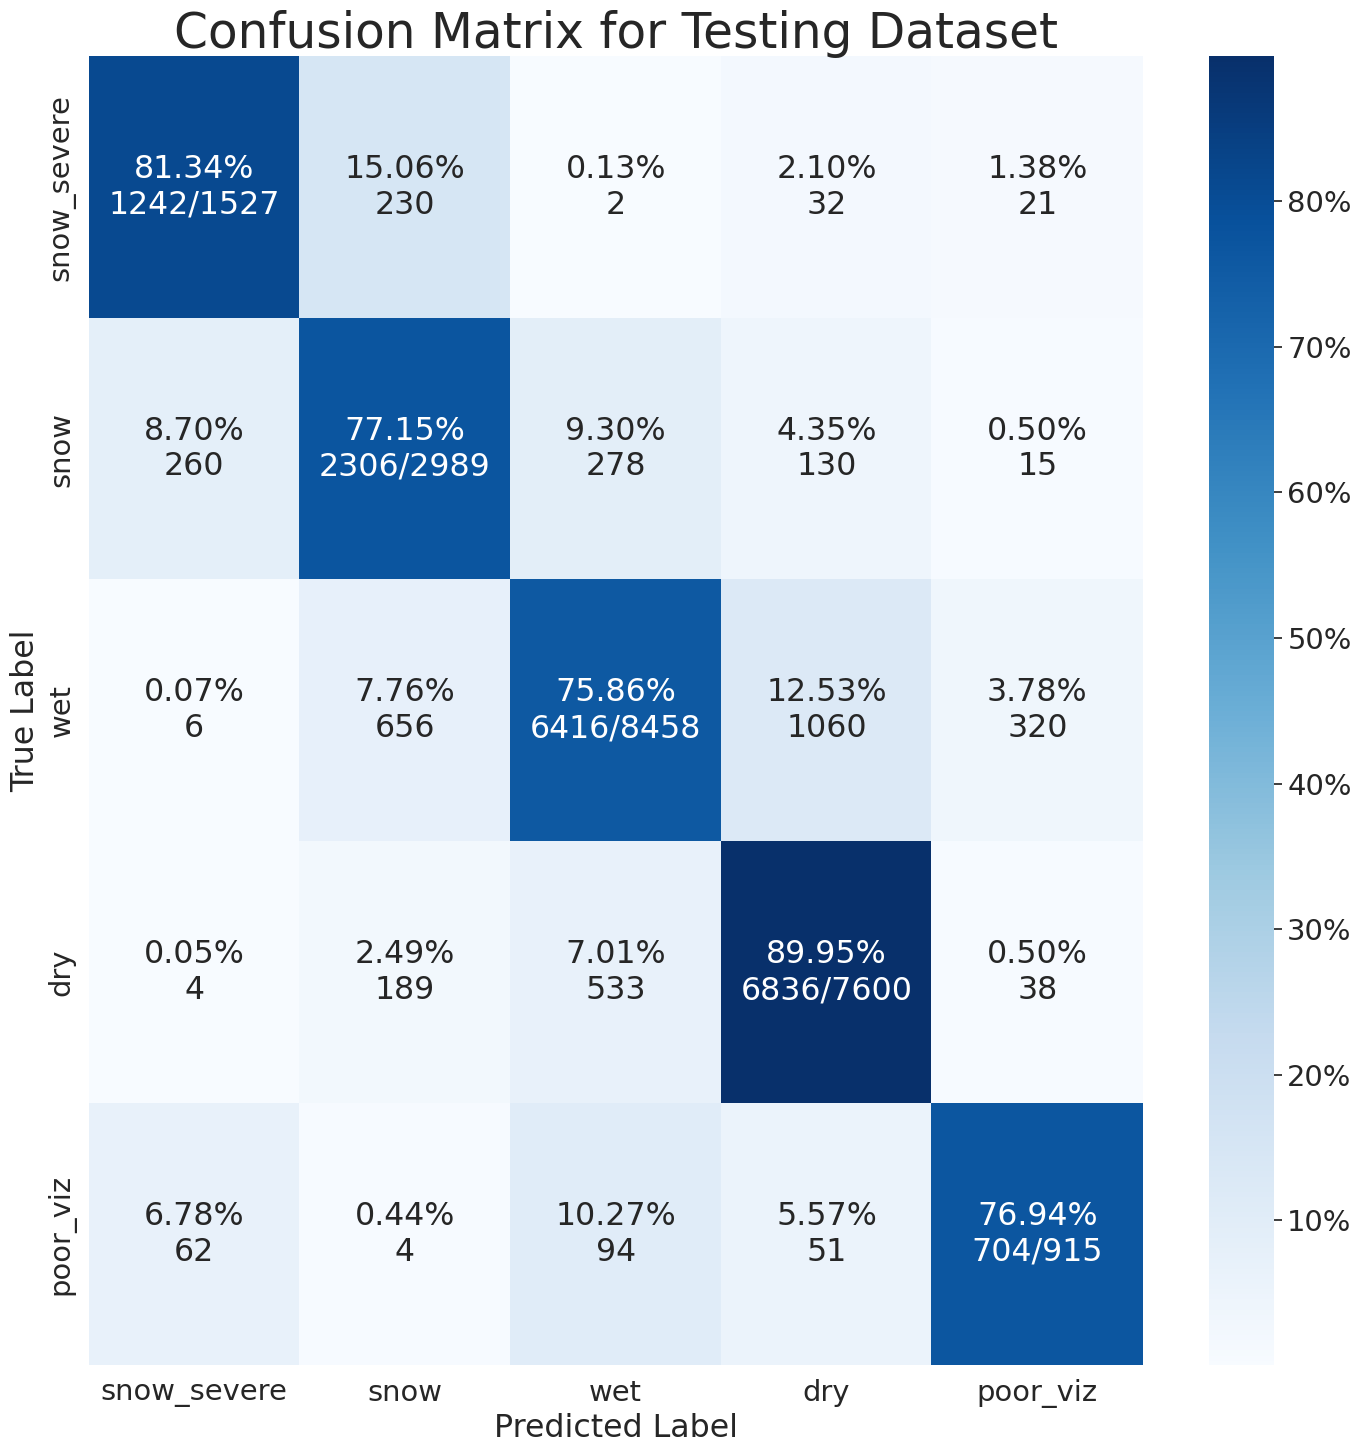

In [6]:


cm_analysis(
    # y_true = df[["img_cat","model_output_class"]]["img_cat"].astype(str),    
    # y_true = df.reset_index(drop=True, inplace=True)
    y_true = df["img_cat"],
    # y_true = df[["img_cat","model_output_class"]]["img_cat"].astype(str), #predsfinal, #valresults_df[valresults_df["phase"]=="val"]["img_cat"],
    # y_pred = df[["img_cat","model_output_class"]]['model_output_class'].astype(str),
    # y_pred = df[["img_cat","model_output_class"]]['model_output_class'].astype(str), # model_pred, final_pred, rf_pred, model_pred, dnn_pred ,df['svm_pred']. Note for rf_pred have to subset data first, see  commented line above
    # filename,
    # FOR 6CLASS
    # y_pred = y_pred.astype(y_pred)
    y_pred = df["select"],

    labels = ["snow_severe", "snow", "wet", "dry", "poor_viz"],
    classes = ["snow_severe", "snow", "wet", "dry", "poor_viz"],
    # FOR 5CLASS (FCSTONLY)
    # labels = ["snow_severe", "snow", "wet", "dry", "poor_viz"],
    # classes = ["snow_severe", "snow", "wet", "dry", "poor_viz"],
    ymap=None,
    figsize=(17, 17),
    titlename="Confusion Matrix for Testing Dataset",
    # "Confusion Matrix of DNN (CNN pred + HRRR data) Model"
    # "Confusion Matrix of Final Merged Model for Site-Specific Split"
    # savefig 
    # filename = "/home/csutter/DRIVE/dot/random_forests/merge_alg/merged_val_all_finalmergedpreds.png"
)
